In [7]:
from composipy import OrthotropicMaterial, LaminateProperty, PlateStructure
from time import time

# Case 1: Biaxial Load

In [35]:
E1 = 137.9e3
E2 = 11.7e3
v12 = 0.31
G12 = 4.82e3
t = 0.1524

a = 100
b = 100

Nxx = -1
Nyy = -0.5


m = 8
n = 8

ti = time()

mat = OrthotropicMaterial(E1, E2, v12, G12, t)
stack = [45, -45]*2 + [0]*2 + [90]*2
stack += stack[::-1]
lam = LaminateProperty(stack, mat)
plate = PlateStructure(lam, a, b, "PINNED", Nxx=Nxx, Nyy=Nyy, m=m, n=n)

print(plate.buckling_analysis())
print(f'{time()-ti} seconds')

(array([225.86401804, 436.75556472, 590.83075165, 759.95011144,
       902.51013339]), array([[ 4.84174196e-01,  3.23399767e-01,  4.62152085e-01,
         1.91278462e-01, -4.36073137e-01],
       [-2.21467384e-01, -2.21259717e-01,  1.74421596e-01,
        -2.10830621e-01, -2.29056781e-01],
       [ 1.52354132e-01,  1.70140573e-01, -2.60670598e-01,
         1.59434369e-01,  1.50782195e-01],
       [ 1.89269165e-01,  2.11809200e-01, -4.76293636e-01,
         2.47895902e-01,  5.91338313e-01],
       [-4.86524836e-02, -2.42886665e-02, -6.01612851e-02,
         1.81217847e-02,  2.26424705e-01],
       [ 1.62180419e-01,  1.12435890e-01,  1.45490295e-01,
         8.20694096e-02, -1.79321195e-01],
       [-2.04553290e-02, -4.78507306e-03, -8.69375304e-02,
         7.51749194e-03,  4.95711666e-02],
       [ 8.44398579e-02,  6.07809623e-02,  1.59295580e-02,
         5.46679283e-02, -9.01223203e-03],
       [-2.21467384e-01,  2.21259717e-01, -1.74421596e-01,
        -2.10830621e-01, -2.29056781e-

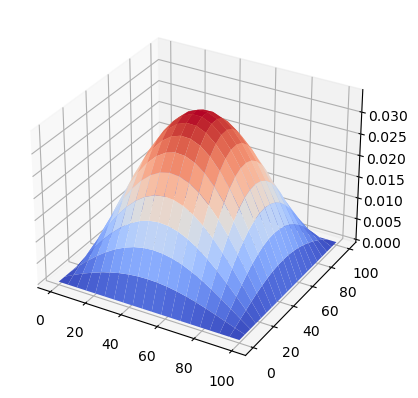

In [36]:
plate.plot_eigenvalue()

# Case 2: Biaxial Load fixed

In [41]:
E1 = 137.9e3
E2 = 11.7e3
v12 = 0.31
G12 = 4.82e3
t = 0.1524

a = 100
b = 100

Nxx = -1
Nyy = -0.5

m = 7
n = 7


mat = OrthotropicMaterial(E1, E2, v12, G12, t)
stack = [45, -45]*2 + [0]*2 + [90]*2
stack += stack[::-1]
lam = LaminateProperty(stack, mat)
plate = PlateStructure(lam, a, b, "CLAMPED", Nxx=Nxx, Nyy=Nyy, m=m, n=n)
plate.buckling_analysis()

(array([ 495.0299361 ,  748.9635072 , 1001.50553694, 1201.76422875,
        1327.59036928]),
 array([[-1.56205114e+00, -1.86614885e-13, -7.16066810e-14,
          4.37744228e-01, -1.05371993e-02],
        [ 1.48132002e-13, -3.38329544e-01, -2.53288776e+00,
         -4.68068773e-13,  1.18923689e-13],
        [ 2.20648496e-01, -1.63153450e-13,  2.31405696e-13,
         -2.17348241e-01, -4.96750017e-01],
        [ 1.44855376e-14,  1.05617093e-01,  1.06935830e+00,
         -9.88358821e-14, -8.02163572e-14],
        [ 2.39807890e-02, -1.67674310e-13,  9.16398501e-14,
          7.78640560e-02,  2.90327731e-01],
        [-3.13883349e-14,  3.07768008e-03, -1.35302772e-01,
          1.19989169e-13, -4.45338644e-14],
        [ 1.06266189e-02, -3.60807807e-14, -2.32944364e-13,
         -1.30139387e-02, -3.98254878e-02],
        [ 3.18606158e-14,  2.40076927e+00, -3.11093749e-01,
          1.04256782e-12,  5.81410155e-13],
        [-5.99242336e-01, -4.52511366e-14,  1.86108946e-13,
         -1.157

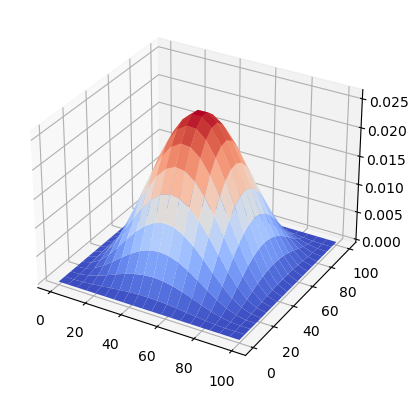

In [40]:
plate.plot_eigenvalue()

# Case 3: Biaxial Load SSSF

In [5]:
E1 = 137.9e3
E2 = 11.7e3
v12 = 0.31
G12 = 4.82e3
t = 0.1524

a = 100
b = 100

Nxx = -1
Nyy = -0.5


constraints = {    
     'x0' : ['TX', 'TY', 'TZ'],
     'xa' : ['TX', 'TY', 'TZ'],
     'y0' : [],
     'yb' : ['TX', 'TY', 'TZ']
 }

mat = OrthotropicMaterial(E1, E2, v12, G12, t)
stack = [45, -45]*2 + [0]*2 + [90]*2
stack += stack[::-1]
lam = LaminateProperty(stack, mat)
plate = PlateStructure(lam, a, b, "PINNED", Nxx=Nxx, Nyy=Nyy)
plate = PlateStructure(lam, a, b, constraints, Nxx=Nxx, Nyy=Nyy)
plate.buckling_analysis()

(array([ 89.62570743, 265.05972502, 297.16642979, 546.70544933,
        591.09866213]),
 array([[-2.46032727e-01, -9.70641003e-02,  1.56276739e-01,
          8.89712264e-03, -1.14927248e-01],
        [ 5.20943409e-01,  1.94376108e-01, -7.70753173e-01,
         -6.04116459e-02,  4.34822252e-01],
        [ 1.53021636e-01,  1.82865495e-01,  1.12885497e-01,
         -2.52655803e-01, -1.26724295e-01],
        [-2.91621573e-01, -4.39455086e-01,  6.93172148e-02,
          4.19288316e-01, -2.23142810e-01],
        [ 1.02617310e-01,  1.57029621e-01, -3.30227355e-01,
          2.07062332e-01,  7.80420617e-01],
        [-1.89722645e-01, -2.52310985e-01,  2.16586727e-01,
          1.54772699e-01, -4.01427961e-01],
        [ 3.62366907e-02,  7.49043391e-02, -1.88673760e-01,
         -4.70605805e-02,  2.68292510e-01],
        [-1.23274220e-01, -1.45885449e-01,  9.96356844e-02,
          1.51193751e-01, -1.90784613e-01],
        [ 1.63907718e-02,  1.94198419e-02, -8.79179177e-02,
         -5.02426850

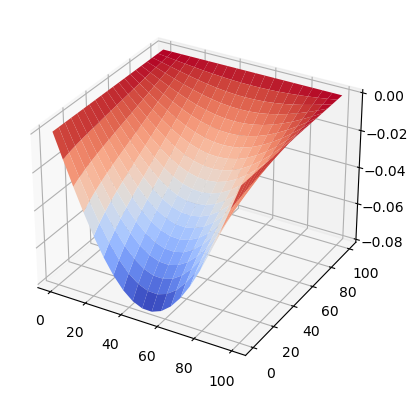

In [6]:
plate.plot_eigenvalue()